In [20]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
import PIL
import pandas as pd
from PIL import Image
from pylab import *

In [2]:
np.random.seed(1)

In [28]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy

    Arguments:
    Z -- numpy array of any shape

    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """

    A = 1/(1+np.exp(-Z))
    cache = Z

    return A, cache

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    Z = cache

    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)

    assert (dZ.shape == Z.shape)

    return dZ

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """

    A = np.maximum(0,Z)

    assert(A.shape == Z.shape)

    cache = Z 
    return A, cache

def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.

    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0

    assert (dZ.shape == Z.shape)

    return dZ

In [3]:
def initialize_parameters(n_x,n_h,n_y):
    """
    此函数是为了初始化两层网络参数而使用的函数。
    参数：
        n_x - 输入层节点数量
        n_h - 隐藏层节点数量
        n_y - 输出层节点数量
    
    返回：
        parameters - 包含你的参数的python字典：
            W1 - 权重矩阵,维度为（n_h，n_x）
            b1 - 偏向量，维度为（n_h，1）
            W2 - 权重矩阵，维度为（n_y，n_h）
            b2 - 偏向量，维度为（n_y，1）

    """
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    #使用断言确保我的数据格式是正确的
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters  


In [4]:
def initialize_parameters_deep(layers_dims):
    """
    此函数是为了初始化多层网络参数而使用的函数。
    参数：
        layers_dims - 包含我们网络中每个图层的节点数量的列表
    
    返回：
        parameters - 包含参数“W1”，“b1”，...，“WL”，“bL”的字典：
                     W1 - 权重矩阵，维度为（layers_dims [1]，layers_dims [1-1]）
                     bl - 偏向量，维度为（layers_dims [1]，1）
    """
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    for l in range(1,L):
        parameters["W" + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])/np.sqrt(layers_dims[l - 1])
        parameters["b" + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

In [5]:
def linear_forward(A,W,b):
    """
    实现前向传播的线性部分。

    参数：
        A - 来自上一层（或输入数据）的激活，维度为(上一层的节点数量，示例的数量）
        W - 权重矩阵，numpy数组，维度为（当前图层的节点数量，前一图层的节点数量）
        b - 偏向量，numpy向量，维度为（当前图层节点数量，1）

    返回：
         Z - 激活功能的输入，也称为预激活参数
         cache - 一个包含“A”，“W”和“b”的字典，存储这些变量以有效地计算后向传递
    """
    Z = np.dot(W,A) + b
    assert(Z.shape == (W.shape[0],A.shape[1]))
    cache = (A,W,b)
     
    return Z,cache


In [6]:
def linear_activation_forward(A_prev,W,b,activation):
    """
    实现LINEAR-> ACTIVATION 这一层的前向传播

    参数：
        A_prev - 来自上一层（或输入层）的激活，维度为(上一层的节点数量，示例数）
        W - 权重矩阵，numpy数组，维度为（当前层的节点数量，前一层的大小）
        b - 偏向量，numpy阵列，维度为（当前层的节点数量，1）
        activation - 选择在此层中使用的激活函数名，字符串类型，【"sigmoid" | "relu"】

    返回：
        A - 激活函数的输出，也称为激活后的值
        cache - 一个包含“linear_cache”和“activation_cache”的字典，我们需要存储它以有效地计算后向传递
    """
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert(A.shape == (W.shape[0],A_prev.shape[1]))
    cache = (linear_cache,activation_cache)
    
    return A,cache


In [7]:
def L_model_forward(X,parameters):
    """
    实现[LINEAR-> RELU] *（L-1） - > LINEAR-> SIGMOID计算前向传播，也就是多层网络的前向传播，为后面每一层都执行LINEAR和ACTIVATION
    
    参数：
        X - 数据，numpy数组，维度为（输入节点数量，示例数）
        parameters - initialize_parameters_deep（）的输出
    
    返回：
        AL - 最后的激活值
        caches - 包含以下内容的缓存列表：
                 linear_relu_forward（）的每个cache（有L-1个，索引为从0到L-2）
                 linear_sigmoid_forward（）的cache（只有一个，索引为L-1）
    """
    caches = []
    A = X
    L = len(parameters) // 2
    for l in range(1,L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], "relu")
        caches.append(cache)
    
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
    
    return AL,caches


In [8]:
def compute_cost(AL,Y):
    """
    实施等式（4）定义的成本函数。

    参数：
        AL - 与标签预测相对应的概率向量，维度为（1，示例数量）
        Y - 标签向量（例如：如果不是猫，则为0，如果是猫则为1），维度为（1，数量）

    返回：
        cost - 交叉熵成本
    """
    m = Y.shape[1]
    cost = -np.sum(np.multiply(np.log(AL),Y) + np.multiply(np.log(1 - AL), 1 - Y)) / m
        
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    return cost


In [9]:
def linear_backward(dZ,cache):
    """
    为单层实现反向传播的线性部分（第L层）

    参数：
         dZ - 相对于（当前第l层的）线性输出的成本梯度
         cache - 来自当前层前向传播的值的元组（A_prev，W，b）

    返回：
         dA_prev - 相对于激活（前一层l-1）的成本梯度，与A_prev维度相同
         dW - 相对于W（当前层l）的成本梯度，与W的维度相同
         db - 相对于b（当前层l）的成本梯度，与b维度相同
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = np.dot(W.T, dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db


In [10]:
def linear_activation_backward(dA,cache,activation="relu"):
    """
    实现LINEAR-> ACTIVATION层的后向传播。
    
    参数：
         dA - 当前层l的激活后的梯度值
         cache - 我们存储的用于有效计算反向传播的值的元组（值为linear_cache，activation_cache）
         activation - 要在此层中使用的激活函数名，字符串类型，【"sigmoid" | "relu"】
    返回：
         dA_prev - 相对于激活（前一层l-1）的成本梯度值，与A_prev维度相同
         dW - 相对于W（当前层l）的成本梯度值，与W的维度相同
         db - 相对于b（当前层l）的成本梯度值，与b的维度相同
    """
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev,dW,db


In [11]:
# dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

In [12]:
def L_model_backward(AL,Y,caches):
    """
    对[LINEAR-> RELU] *（L-1） - > LINEAR - > SIGMOID组执行反向传播，就是多层网络的向后传播
    
    参数：
     AL - 概率向量，正向传播的输出（L_model_forward（））
     Y - 标签向量（例如：如果不是猫，则为0，如果是猫则为1），维度为（1，数量）
     caches - 包含以下内容的cache列表：
                 linear_activation_forward（"relu"）的cache，不包含输出层
                 linear_activation_forward（"sigmoid"）的cache
    
    返回：
     grads - 具有梯度值的字典
              grads [“dA”+ str（l）] = ...
              grads [“dW”+ str（l）] = ...
              grads [“db”+ str（l）] = ...
    """
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    
    return grads


In [13]:
def update_parameters(parameters, grads, learning_rate):
    """
    使用梯度下降更新参数
    
    参数：
     parameters - 包含你的参数的字典
     grads - 包含梯度值的字典，是L_model_backward的输出
    
    返回：
     parameters - 包含更新参数的字典
                   参数[“W”+ str（l）] = ...
                   参数[“b”+ str（l）] = ...
    """
    L = len(parameters) // 2 #整除
    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
        
    return parameters


In [57]:
def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False,isPlot=True):
    """
    实现一个L层神经网络：[LINEAR-> RELU] *（L-1） - > LINEAR-> SIGMOID。
    
    参数：
	    X - 输入的数据，维度为(n_x，例子数)
        Y - 标签，向量，0为非猫，1为猫，维度为(1,数量)
        layers_dims - 层数的向量，维度为(n_y,n_h,···,n_h,n_y)
        learning_rate - 学习率
        num_iterations - 迭代的次数
        print_cost - 是否打印成本值，每100次打印一次
        isPlot - 是否绘制出误差值的图谱
    
    返回：
     parameters - 模型学习的参数。 然后他们可以用来预测。
    """
    np.random.seed(1)
    costs = []
    
    parameters = initialize_parameters_deep(layers_dims=layers_dims)
    
    for i in range(0,num_iterations):
        AL , caches = L_model_forward(X,parameters)
        
        cost = compute_cost(AL,Y)
        
        grads = L_model_backward(AL,Y,caches)
        
        parameters = update_parameters(parameters,grads,learning_rate)
        
        #打印成本值，如果print_cost=False则忽略
        if i % 100 == 0:
            #记录成本
            costs.append(cost)
            #是否打印成本值
            if print_cost:
                print("第", i ,"次迭代，成本值为：" ,np.squeeze(cost))
    #迭代完成，根据条件绘制图
    if isPlot:
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
    return parameters


In [36]:
def predict(X, y, parameters):
    """
    该函数用于预测L层神经网络的结果，当然也包含两层
    
    参数：
     X - 测试集
     y - 标签
     parameters - 训练模型的参数
    
    返回：
     p - 给定数据集X的预测
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # 神经网络的层数
    p = np.zeros((1,m))
    
    #根据参数前向传播
    probas, caches = L_model_forward(X, parameters)
    
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    print("准确度为: "  + str(float(np.sum((p == y))/m)))
        
    return p


In [15]:
def get_imlist(path): 
    return [os.path.join(path,f) for f in os.listdir(path) if (f.endswith('.jpg') or f.endswith('.png') or f.endswith('.gif'))]

In [21]:
## img_list = get_imlist("F:\\SP2021\\MCM\MCM_C\\2021MCM_ProblemC_Files\\2021MCM_ProblemC_Files")

all_data = pd.read_csv('./data/Joined.csv', encoding='utf-8', index_col='Detection Date')
# all_data
all_data.index = pd.to_datetime(all_data.index, errors='coerce')
all_data = all_data.sort_values(by = 'Detection Date', ascending=True)

## positive
data_positive = all_data[(all_data['Lab Status'] == "Positive ID")]
positive_img_list = []
x_s, y_s = 250, 250
for file in data_positive['FileName']:
    im = Image.open(os.path.join("F:\\SP2021\\MCM\MCM_C\\2021MCM_ProblemC_Files\\2021MCM_ProblemC_Files", file))
    rgb = im.split()
    red, green, blue = rgb[0], rgb[1], rgb[2]
    r, g, b = rgb[0].resize((x_s, y_s), Image.ANTIALIAS), rgb[1].resize((x_s, y_s), Image.ANTIALIAS), rgb[2].resize((x_s, y_s), Image.ANTIALIAS)
    new_image = Image.merge("RGB", (r, g, b))
    positive_img_list.append(np.array(new_image))

## negative
data_negative = all_data[(all_data['Lab Status'] == "Negative ID") & (all_data['FileType'] == 'image/jpg')]
negative_img_list = []
for file in data_negative['FileName']:
    im = Image.open(os.path.join("F:\\SP2021\\MCM\MCM_C\\2021MCM_ProblemC_Files\\2021MCM_ProblemC_Files", file))
    rgb = im.split()
    red, green, blue = rgb[0], rgb[1], rgb[2]
    r, g, b = rgb[0].resize((x_s, y_s)), rgb[1].resize((x_s, y_s)), rgb[2].resize((x_s, y_s))
    new_image = Image.merge("RGB", (r, g, b))
    negative_img_list.append(np.array(new_image))

positive_img_list_added = get_imlist('F:\\SP2021\\MCM2021\\MCM2021_C\\data\\RefImages')
for file in positive_img_list_added:
    im = Image.open(file)
    rgb = im.split()
    red, green, blue = rgb[0], rgb[1], rgb[2]
    r, g, b = rgb[0].resize((x_s, y_s), Image.ANTIALIAS), rgb[1].resize((x_s, y_s), Image.ANTIALIAS), rgb[2].resize((x_s, y_s), Image.ANTIALIAS)
    new_image = Image.merge("RGB", (r, g, b))
    positive_img_list.append(np.array(new_image))

In [22]:
m_train_positive = len(positive_img_list)
m_train_negative = len(negative_img_list)
print('positive:' + str(m_train_positive) + '  negative:' + str(m_train_negative))

train_set_x_orig = np.array(positive_img_list[0:200] + negative_img_list[0:500])
train_set_y = np.array([[1 for i in range(200)] + [0 for i in range(500)]])
train_set_y.reshape(1,700)

test_set_x_orig = np.array(positive_img_list[201:] + negative_img_list[501:551])
test_set_y = np.array([[1 for i in range(10)] + [0 for i in range(50)]])
test_set_y.reshape(1,60)

positive:211  negative:3019


array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [23]:
m_train = train_set_y.shape[1] #训练集里图片的数量。
m_test = test_set_y.shape[1] #测试集里图片的数量。
num_px = train_set_x_orig.shape[1] #训练、测试集里面的图片的宽度和高度（均为64x64）。

#现在看一看我们加载的东西的具体情况
print ("训练集的数量: m_train = " + str(m_train))
print ("测试集的数量 : m_test = " + str(m_test))
print ("每张图片的宽/高 : num_px = " + str(num_px))
print ("每张图片的大小 : (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("训练集_图片的维数 : " + str(train_set_x_orig.shape))
print ("训练集_标签的维数 : " + str(train_set_y.shape))
print ("测试集_图片的维数: " + str(test_set_x_orig.shape))
print ("测试集_标签的维数: " + str(test_set_y.shape))

# index = 6
# plt.imshow(train_set_x_orig[index])
# print("y=" + str(train_set_y[:,index]))

训练集的数量: m_train = 700
测试集的数量 : m_test = 60
每张图片的宽/高 : num_px = 250
每张图片的大小 : (250, 250, 3)
训练集_图片的维数 : (700, 250, 250, 3)
训练集_标签的维数 : (1, 700)
测试集_图片的维数: (60, 250, 250, 3)
测试集_标签的维数: (1, 60)


In [55]:
#X_flatten = X.reshape(X.shape [0]，-1).T ＃X.T
train_set_x_flatten  = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

In [56]:
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

第 0 次迭代，成本值为： 1.0756051743338655
第 100 次迭代，成本值为： 0.6789132749580532
第 200 次迭代，成本值为： 0.66693391167451
第 300 次迭代，成本值为： 0.6567516395967335
第 400 次迭代，成本值为： 0.6480837986849223
第 500 次迭代，成本值为： 0.6406969580982045
第 600 次迭代，成本值为： 0.6343975520375298
第 700 次迭代，成本值为： 0.6290187095586615
第 800 次迭代，成本值为： 0.6243154895485414
第 900 次迭代，成本值为： 0.5985247598600338
第 1000 次迭代，成本值为： 0.5495753053097407
第 1100 次迭代，成本值为： 0.5047674750708196
第 1200 次迭代，成本值为： 0.4610562833525429
第 1300 次迭代，成本值为： 0.4275720271510646
第 1400 次迭代，成本值为： 0.40179537049855363
第 1500 次迭代，成本值为： 0.37765821508133446
第 1600 次迭代，成本值为： 0.3485434485939173
第 1700 次迭代，成本值为： 0.324880244359377
第 1800 次迭代，成本值为： 0.29659786449062286
第 1900 次迭代，成本值为： 0.2824753056598245
第 2000 次迭代，成本值为： 0.2654269817329834
第 2100 次迭代，成本值为： 0.2601092811805718
第 2200 次迭代，成本值为： 0.2464153440373555
第 2300 次迭代，成本值为： 0.2237016891034496
第 2400 次迭代，成本值为： 0.2184327182202627
第 2500 次迭代，成本值为： 0.2270226157454978
第 2600 次迭代，成本值为： 0.19406663282534825
第 2700 次迭代，成本值为： 0.18752130439596215
第 

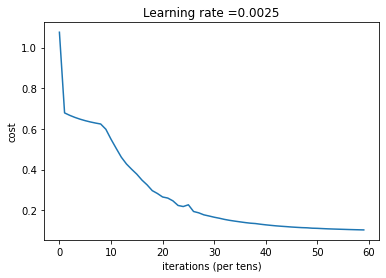

In [60]:
layers_dims = [187500, 20, 7, 5, 1] #  5-layer model
parameters = L_layer_model(train_set_x, train_set_y, layers_dims, num_iterations = 6000, print_cost = True,isPlot=True,learning_rate=0.0025)



In [74]:
pred_train = predict(train_set_x, train_set_y, parameters) #训练集
pred_test = predict(test_set_x, test_set_y, parameters) #测试集


准确度为: 0.9771428571428571
准确度为: 0.7333333333333333


In [63]:
p0 = parameters

In [67]:
print(p0)


{'W1': array([[ 0.00404588,  0.00073555, -0.00036832, ...,  0.00288035,
         0.00233127,  0.00190674],
       [ 0.00161943,  0.00023492,  0.00155635, ..., -0.00304985,
        -0.00390836, -0.00119377],
       [ 0.00237332, -0.00074228,  0.00206453, ...,  0.00149132,
        -0.00241206,  0.00424698],
       ...,
       [ 0.00439441, -0.00106276, -0.00087046, ...,  0.00031568,
        -0.00224468,  0.00129285],
       [ 0.00068183,  0.00206695,  0.00184184, ..., -0.00060704,
        -0.0063644 ,  0.00011748],
       [-0.00059103,  0.00030206, -0.00479808, ...,  0.00592744,
         0.00796031,  0.00511863]]), 'b1': array([[ 1.21190249e-04],
       [-3.68238881e-04],
       [-3.08779099e-04],
       [-1.27980161e-04],
       [-2.61517055e-04],
       [-1.61325422e-04],
       [-6.29794350e-05],
       [-1.16721787e-03],
       [-2.05719559e-04],
       [-1.89929347e-04],
       [-2.59512325e-04],
       [-3.77975253e-05],
       [ 2.28953596e-04],
       [ 5.19313254e-04],
       [-

In [66]:
def L_layer_model_continue(X, Y, layers_dims, parameters_orig, learning_rate=0.0075, num_iterations=3000, print_cost=False,isPlot=True):
    """
    实现一个L层神经网络：[LINEAR-> RELU] *（L-1） - > LINEAR-> SIGMOID。
    
    参数：
	    X - 输入的数据，维度为(n_x，例子数)
        Y - 标签，向量，0为非猫，1为猫，维度为(1,数量)
        layers_dims - 层数的向量，维度为(n_y,n_h,···,n_h,n_y)
        learning_rate - 学习率
        num_iterations - 迭代的次数
        print_cost - 是否打印成本值，每100次打印一次
        isPlot - 是否绘制出误差值的图谱
    
    返回：
     parameters - 模型学习的参数。 然后他们可以用来预测。
    """
    np.random.seed(1)
    costs = []
    
    parameters = parameters_orig
    
    for i in range(0,num_iterations):
        AL , caches = L_model_forward(X,parameters)
        
        cost = compute_cost(AL,Y)
        
        grads = L_model_backward(AL,Y,caches)
        
        parameters = update_parameters(parameters,grads,learning_rate)
        
        #打印成本值，如果print_cost=False则忽略
        if i % 100 == 0:
            #记录成本
            costs.append(cost)
            #是否打印成本值
            if print_cost:
                print("第", i ,"次迭代，成本值为：" ,np.squeeze(cost))
    #迭代完成，根据条件绘制图
    if isPlot:
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
    return parameters


第 0 次迭代，成本值为： 0.6075114409935868
第 100 次迭代，成本值为： 0.436555435492097
第 200 次迭代，成本值为： 0.42893085201592074
第 300 次迭代，成本值为： 0.3747488766111376
第 400 次迭代，成本值为： 0.3528255049180154
第 500 次迭代，成本值为： 0.3772934158556684
第 600 次迭代，成本值为： 0.34305394896931124
第 700 次迭代，成本值为： 0.31085448084858075
第 800 次迭代，成本值为： 0.27886700921618296
第 900 次迭代，成本值为： 0.3519960592013138
第 1000 次迭代，成本值为： 0.2850407353974842
第 1100 次迭代，成本值为： 0.24941640836922999
第 1200 次迭代，成本值为： 0.24105866564553022
第 1300 次迭代，成本值为： 0.34616858572840203
第 1400 次迭代，成本值为： 0.20917609627507383
第 1500 次迭代，成本值为： 0.2010890398056711
第 1600 次迭代，成本值为： 0.19526043777123248
第 1700 次迭代，成本值为： 0.18222374860566348
第 1800 次迭代，成本值为： 0.18274591212493993
第 1900 次迭代，成本值为： 0.1890413000129664
第 2000 次迭代，成本值为： 0.16361102938715405
第 2100 次迭代，成本值为： 0.1586382321798861
第 2200 次迭代，成本值为： 0.15347454999418117
第 2300 次迭代，成本值为： 0.148994013609019
第 2400 次迭代，成本值为： 0.14488859730974604
第 2500 次迭代，成本值为： 0.1415627239040942
第 2600 次迭代，成本值为： 0.13754254712533354
第 2700 次迭代，成本值为： 0.13466698

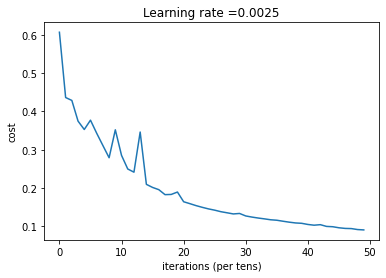

In [72]:
layers_dims = [187500, 20, 5, 1] #  4-layer model
p1 = L_layer_model(train_set_x, train_set_y, layers_dims, num_iterations = 5000, print_cost = True,isPlot=True,learning_rate=0.0025)


In [73]:
pred_train = predict(train_set_x, train_set_y, p1) #训练集
pred_test = predict(test_set_x, test_set_y, p1) #测试集

准确度为: 0.9985714285714286
准确度为: 0.8
